# Capping / Censoring outliers



In this notebook, we will cap the variable values at certain limits.

We we calculate those limits using:

- The normal distribution
- The IQR proximity rule
- The quantiles

In a dataset like this one, we probably don't want to get rid of rare occurrences, because those would probably point us to the disease diagnosis. Please, be mindful, when removing outliers, that they may be actually informative, depending on your use case.

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [89]:
# load the California House price data from Scikit-learn
breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = breast_cancer.target

# let's separate the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((398, 30), (171, 30))

In [90]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
478,11.490,14.59,73.99,404.9,0.10460,0.08228,0.05308,0.01969,0.1779,0.06574,...,12.40,21.90,82.04,467.6,0.1352,0.2010,0.25960,0.07431,0.2941,0.09180
303,10.490,18.61,66.86,334.3,0.10680,0.06678,0.02297,0.01780,0.1482,0.06600,...,11.06,24.54,70.76,375.4,0.1413,0.1044,0.08423,0.06528,0.2213,0.07842
155,12.250,17.94,78.27,460.3,0.08654,0.06679,0.03885,0.02331,0.1970,0.06228,...,13.59,25.22,86.60,564.2,0.1217,0.1788,0.19430,0.08211,0.3113,0.08132
186,18.310,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.1234,0.2445,0.35380,0.15710,0.3206,0.06938
101,6.981,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.00000,0.1930,0.07818,...,7.93,19.54,50.41,185.2,0.1584,0.1202,0.00000,0.00000,0.2932,0.09382


In [91]:
def plot_boxplot_and_hist(data, variable):
    
    # creating a figure composed of two matplotlib.Axes 
    # objects (ax_box and ax_hist)
    
    f, (ax_box, ax_hist) = plt.subplots(
        2, sharex=True, gridspec_kw={"height_ratios": (0.50, 0.85)}
    )

    # assigning a graph to each ax
    sns.boxplot(x=data[variable], ax=ax_box)
    sns.histplot(data=data, x=variable, ax=ax_hist)

    # Remove x axis name for the boxplot
    ax_box.set(xlabel="")
    plt.title(variable)
    plt.show()

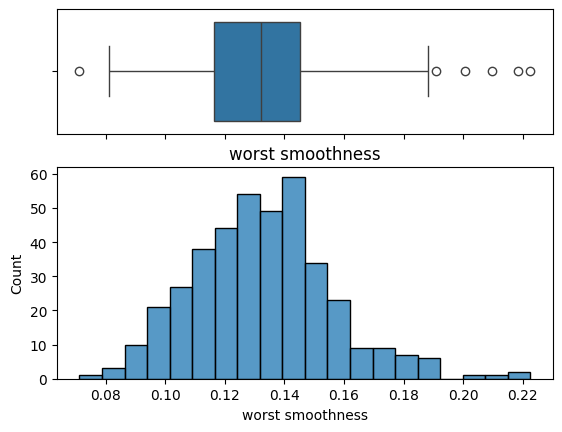

In [92]:
plot_boxplot_and_hist(X_train, "worst smoothness")

# some outliers in right and left

## Normal distribution to cap outliers

In [93]:
def find_limits(df, variable, fold):
    lower_limit = df[variable].mean() - fold * df[variable].std()
    upper_limit = df[variable].mean() + fold * df[variable].std()
    return lower_limit, upper_limit

In [94]:
# we find the limits

lower_limit, upper_limit = find_limits(X_train, "worst smoothness", 3)
lower_limit, upper_limit

#left limit 0.06
# right limit 0.20

(np.float64(0.06356074164705167), np.float64(0.20149734880520964))

In [95]:
# Cap variables

X_train["worst smoothness"].clip(lower=lower_limit, upper=upper_limit, inplace=True)
X_test["worst smoothness"].clip(lower=lower_limit, upper=upper_limit, inplace=True)

C:\Users\shahr\AppData\Local\Temp\ipykernel_36164\2363240329.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train["worst smoothness"].clip(lower=lower_limit, upper=upper_limit, inplace=True)
C:\Users\shahr\AppData\Local\Temp\ipykernel_36164\2363240329.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [96]:
# limits after capping:

X_train["worst smoothness"].min(), X_train["worst smoothness"].max()

# left limit set to 0.07 and right limit set to 0.20

(0.07117, 0.20149734880520964)

In [97]:
# the size remains the same, we are capping,
# not removing values in this case

X_train.shape, X_test.shape

((398, 30), (171, 30))

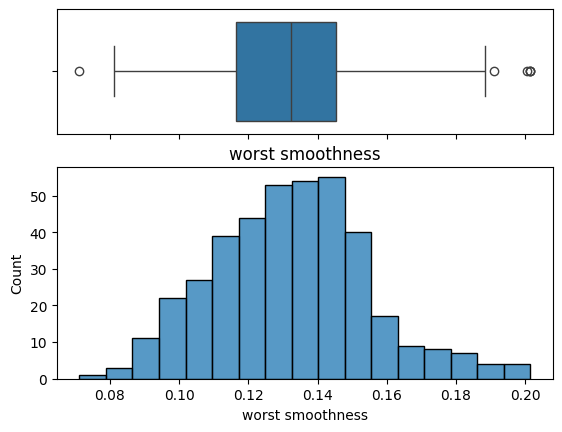

In [98]:
plot_boxplot_and_hist(X_train, "worst smoothness")

# still we can see outliers in left and right but few less than before.

## IQR

In [99]:
def find_limits(df, variable, fold):

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_limit = df[variable].quantile(0.25) - (IQR * fold)
    upper_limit = df[variable].quantile(0.75) + (IQR * fold)

    return lower_limit, upper_limit

The rest of the procedure is identical.

In [100]:
# let's separate the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
)

In [101]:
# we find the limits

lower_limit, upper_limit = find_limits(X_train, "worst smoothness", 1.5)
lower_limit, upper_limit

(np.float64(0.07283749999999997), np.float64(0.18873750000000003))

In [102]:
# Cap outliers

X_train["worst smoothness"].clip(lower=lower_limit, upper=upper_limit, inplace=True)
X_test["worst smoothness"].clip(lower=lower_limit, upper=upper_limit, inplace=True)

C:\Users\shahr\AppData\Local\Temp\ipykernel_36164\1283942644.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train["worst smoothness"].clip(lower=lower_limit, upper=upper_limit, inplace=True)
C:\Users\shahr\AppData\Local\Temp\ipykernel_36164\1283942644.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

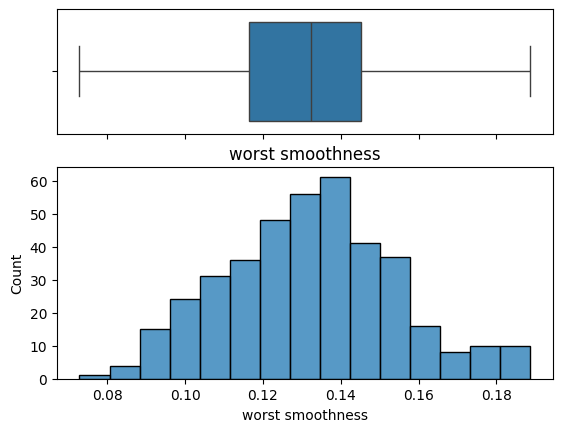

In [103]:
plot_boxplot_and_hist(X_train, "worst smoothness") #outliers properly removed in this scene

## Quantiles

In [104]:
def find_limits(df, variable):
    lower_limit = X_train[variable].quantile(0.05)
    upper_limit = X_train[variable].quantile(0.95)
    return lower_limit, upper_limit

In [105]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
)

In [106]:
# we find the limits

lower_limit, upper_limit = find_limits(X_train, "worst smoothness")
lower_limit, upper_limit

(np.float64(0.0960535), np.float64(0.17321499999999998))

In [107]:
# Cap outliers

X_train["worst smoothness"].clip(lower=lower_limit, upper=upper_limit, inplace=True)
X_test["worst smoothness"].clip(lower=lower_limit, upper=upper_limit, inplace=True)

C:\Users\shahr\AppData\Local\Temp\ipykernel_36164\1283942644.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train["worst smoothness"].clip(lower=lower_limit, upper=upper_limit, inplace=True)
C:\Users\shahr\AppData\Local\Temp\ipykernel_36164\1283942644.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

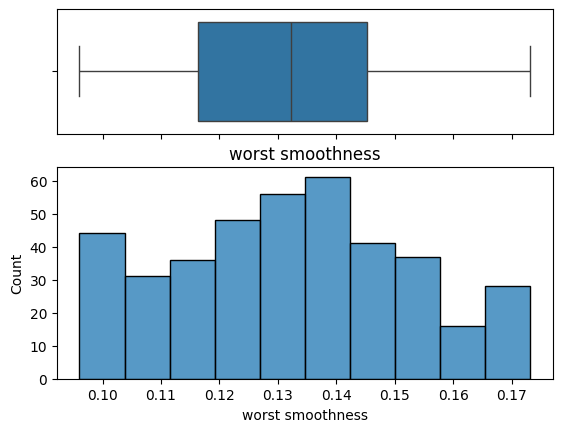

In [108]:
plot_boxplot_and_hist(X_train, "worst smoothness") #outliers prperly removed in this scene

! Notice: we usually don't cap data for medical data. Although we did them here but we should be careful while capping or removing outliers in medical data.